# Explaining Models with Shap

# (Core) Project 1: Global Explanations

## Task
- For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

## Project 1 Revisited - Part 2: Global Explanations
Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

## Explain your tree-based model with shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        - Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## Update your README.
- Insert your exported figures and corresponding interpretations from above into your README file. You should have:
    - a summary plot - bar version
        - Your comparison of most important features found by shap vs feature importance.
    - a summary plot - dot version
        - Your interpretation of the top 3 most important features and how they influence your model's predictions.

**Submit the link to your project repository as your final submission for this assignment.**

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)

In [2]:
import joblib
loaded_joblib = joblib.load('random_forest.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [3]:
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
RandomForest = loaded_joblib['RandomForest']

Note:  I tried to use .transform but got an error.  Re-fitting works so I left it.

In [4]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
7503                 -0.740321         -0.167776            -0.115397   
2957                 -0.740321         -0.167776            -0.115397   
7031                  1.350766         -0.167776            -0.115397   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
7503         -0.285261        -0.293515                3.018928   
2957         -0.285261        -0.293515               -0.331243   
7031          3.505564        -0.293515               -0.331243   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
7503                        -0.417297              -0.164795   
2957                        -0.417297              -0.164795   
7031                        -0.417297              -0.164795   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
7503                     -0.254908            -0.349276       -0.222687   
2957                      3.922976            -0.349276       -0.222687   
7031                     -0.254908            -0.349276       -0.222687   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
7503         -0.144084          -0.081328              -0.406384   
2957         -0.144084          -0.081328              -0.406384   
7031         -0.144084          -0.081328              -0.406384   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_Medium  \
7503              -0.233691                -0.139491           -1.257196   
2957              -0.233691                -0.139491           -1.257196   
7031              -0.233691                -0.139491            0.795421   

      Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
7503          -0.623184                    -0.700976   
2957           1.604663                    -0.700976   
7031          -0.623184                    -0.700976   

      Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
7503                     1.235105                       0.730976   
2957                    -0.809648                       0.730976   
7031                    -0.809648                       0.730976   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
7503                      -0.351809                      -0.357121   
2957                      -0.351809                      -0.357121   
7031                      -0.351809                      -0.357121   

      Item_Weight  Item_Visibility  Item_MRP  
7503     0.331009        -0.776646 -0.998816  
2957    -1.179892         0.100317 -1.585194  
7031     0.378447        -0.482994 -1.595784

In [5]:
# Modeling - RandomForestRegressor
## fit random forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForest
rf_reg.fit(X_train_df,y_train)
print(f"Training R^2: {rf_reg.score(X_train_df,y_train):.3f}")
print(f"Test R^2: {rf_reg.score(X_test_df, y_test):.3f}")

Training R^2: 0.936
Test R^2: 0.538


In [6]:
import shap
shap.initjs()

In [7]:
X_shap = shap.sample(X_train_df, nsamples=200, random_state=321)
X_shap

Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
3888                  1.350766         -0.167776            -0.115397   
2497                  1.350766         -0.167776            -0.115397   
7723                 -0.740321         -0.167776            -0.115397   
8117                 -0.740321         -0.167776            -0.115397   
7475                 -0.740321         -0.167776            -0.115397   
...                        ...               ...                  ...   
4033                 -0.740321         -0.167776            -0.115397   
3230                  1.350766         -0.167776            -0.115397   
2341                 -0.740321         -0.167776            -0.115397   
823                  -0.740321         -0.167776            -0.115397   
6159                 -0.740321         -0.167776            -0.115397   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
3888         -0.285261        -0.293515                3.018928   
2497         -0.285261        -0.293515               -0.331243   
7723         -0.285261        -0.293515               -0.331243   
8117         -0.285261        -0.293515               -0.331243   
7475         -0.285261        -0.293515               -0.331243   
...                ...              ...                     ...   
4033         -0.285261        -0.293515               -0.331243   
3230         -0.285261        -0.293515               -0.331243   
2341         -0.285261        -0.293515               -0.331243   
823          -0.285261        -0.293515               -0.331243   
6159         -0.285261         3.406977               -0.331243   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
3888                        -0.417297              -0.164795   
2497                         2.396376              -0.164795   
7723                         2.396376              -0.164795   
8117                         2.396376              -0.164795   
7475                        -0.417297              -0.164795   
...                               ...                    ...   
4033                         2.396376              -0.164795   
3230                         2.396376              -0.164795   
2341                        -0.417297              -0.164795   
823                         -0.417297              -0.164795   
6159                        -0.417297              -0.164795   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
3888                     -0.254908            -0.349276       -0.222687   
2497                     -0.254908            -0.349276       -0.222687   
7723                     -0.254908            -0.349276       -0.222687   
8117                     -0.254908            -0.349276       -0.222687   
7475                      3.922976            -0.349276       -0.222687   
...                            ...                  ...             ...   
4033                     -0.254908            -0.349276       -0.222687   
3230                     -0.254908            -0.349276       -0.222687   
2341                      3.922976            -0.349276       -0.222687   
823                      -0.254908             2.863062       -0.222687   
6159                     -0.254908            -0.349276       -0.222687   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
3888         -0.144084          -0.081328              -0.406384   
2497         -0.144084          -0.081328              -0.406384   
7723         -0.144084          -0.081328              -0.406384   
8117         -0.144084          -0.081328              -0.406384   
7475         -0.144084          -0.081328              -0.406384   
...                ...                ...                    ...   
4033         -0.144084          -0.081328              -0.406384   
3230         -0.144084          -0.081328              -0.406384   
2341         -0.144084          -0.081328 

In [8]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
4033    1771.0280
3230    1416.8224
2341    1301.6390
823     1856.2504
6159     697.0926
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [9]:
explainer = shap.Explainer(rf_reg)
explainer

In [10]:
# We will then calculate the shap_values by running the explainer as a function with X_shap and y_shap as the arguments.
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(200, 26)

In [11]:
X_shap.shape

(200, 26)

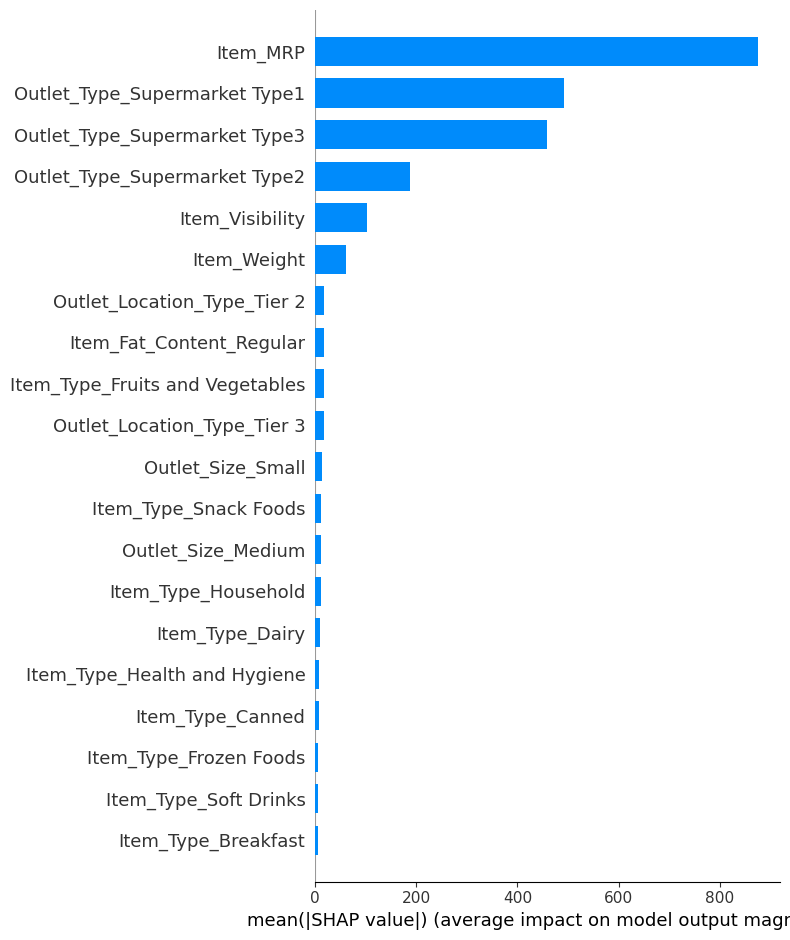

In [12]:
# Using fig.savefig
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
#ax.set_title('Summary SHAP Bar Plot');

ax.set(xlabel='Mean Shap Values',
            title='Summary SHAP Bar Plot')
#plt.subplots_adjust(bottom=0.15, top=1.0)
fig.tight_layout()

In [13]:
fig.savefig('images/shap_bar_plot.png')

## Question: Compare the most important features according to SHAP vs. your original feature importances. Are they the same features in both? If not, what's different?

Following are the figure "permutation importance" feature: 






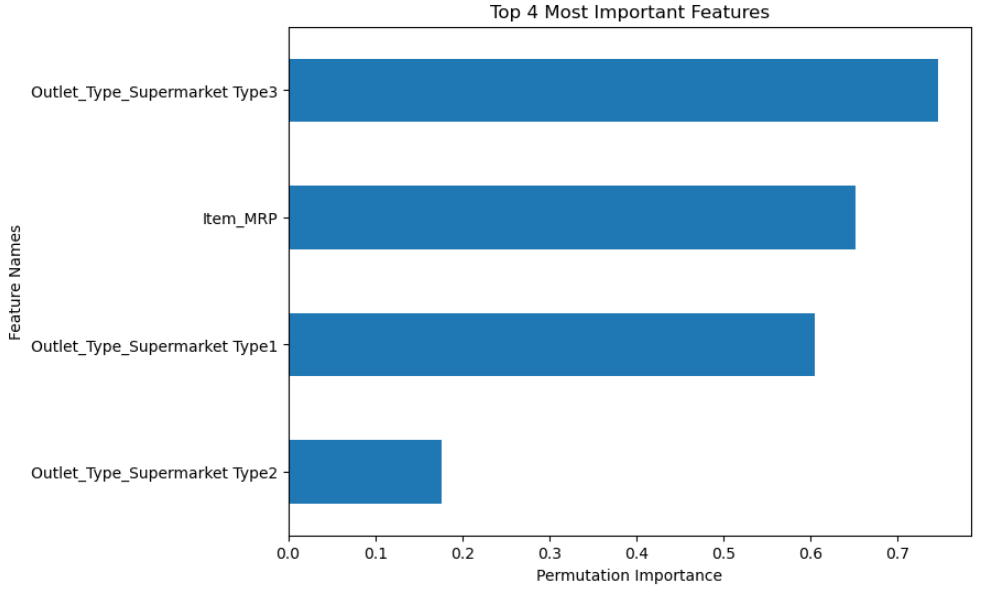

I looked at feature importance in a couple  different ways - "permutation importance" and "SHAP importance."  The top features measured by permutation importance in descending order are Supermarket type 3, item_MRP, Supermarket type 1, and Supermarket type 2.  The top features measured by SHAP are item_MRP, Supermarket type 1, Supermarket type 3, Supermarket type 2.  The top features are the same but the order of them is different.



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


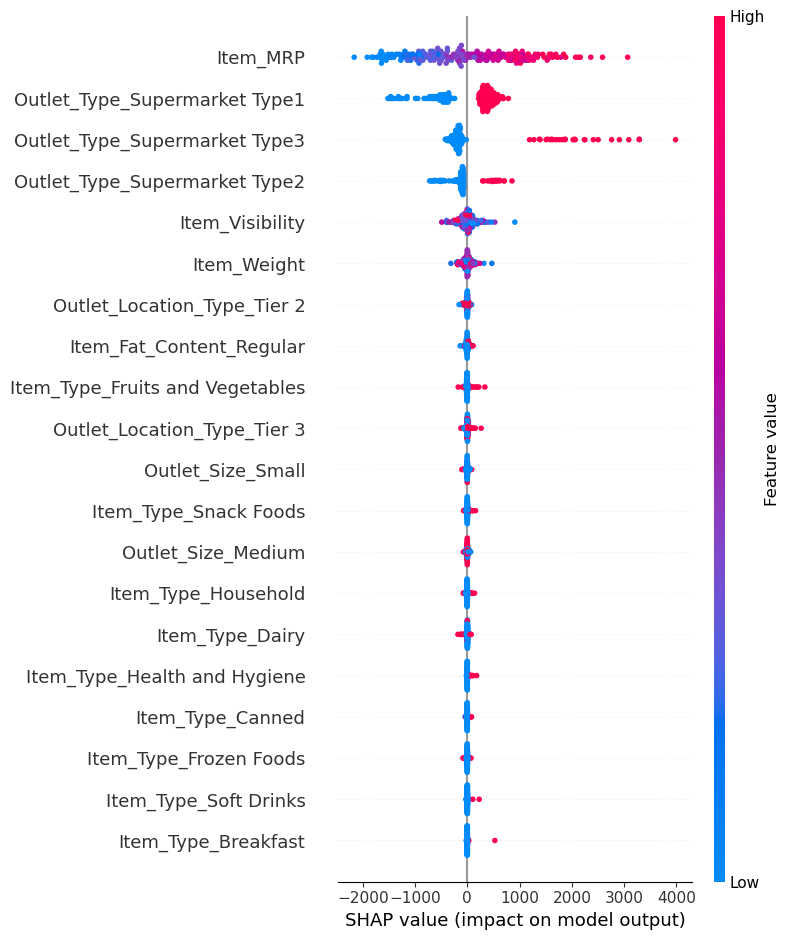

In [14]:
shap.summary_plot(shap_values,X_shap)

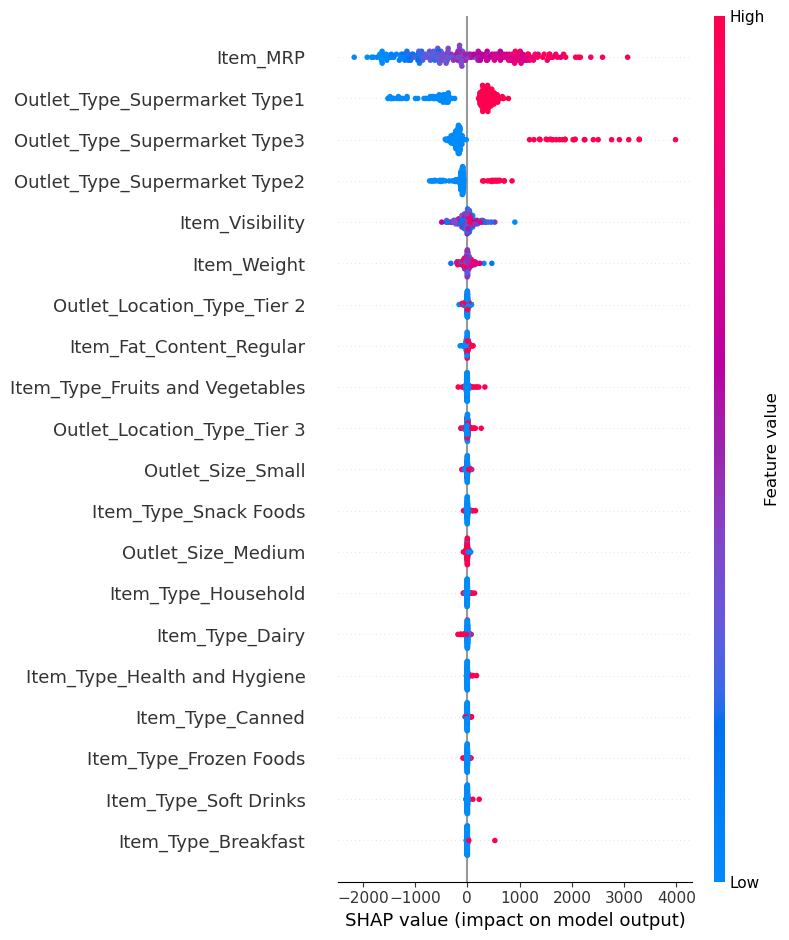

In [15]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap)
ax.set_title('Summary Plot');

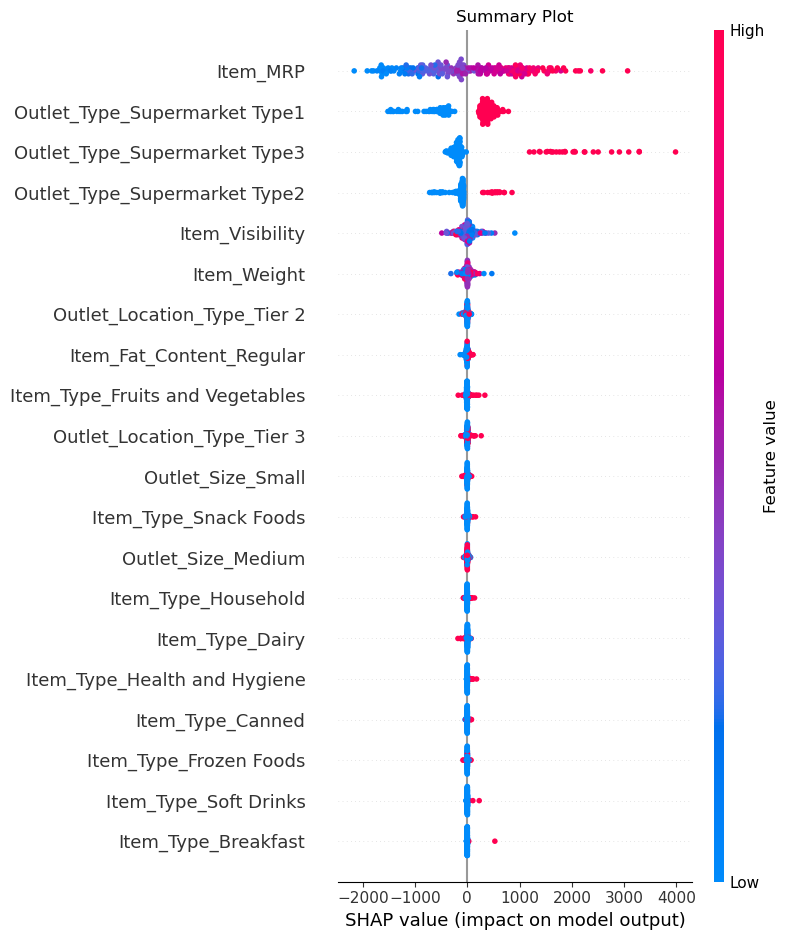

In [16]:
# Using fig.savefig
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show=False)
ax.set_title('Summary Plot');
fig.tight_layout();
fig.savefig('images/summary_plot.png')

## The top 3 most important features and how they influence your model's predictions.

Per Shap, the most important four features are item_MRP, Supermarket type 1, Supermarket type 3, Supermarket type 2.  

For item_MRP, as the price of the item increases, the total sales volume of the items increases.  

Supermarket type are all categorical features.  If the store is a supermarket type 3, the sales volume increases significantly.  This would imply that supermarket 3 is the highest volume supermarket.  If the supermarket is type 1 or 2, the sales volume increases but not as much as for type 3.  

# Local Explanations


## Task
- For this assignment, you will be revisiting your first project to predict supermarket sales. You will be applying everything you've learned this week to explain how your models made their predictions.

## Part 3 - Local Explanations
Continue working in your model explanation notebook from the previous core assignment. Add a new "Local Explanations" header at the bottom and continue your work:

- Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week.
- Explain why you selected the examples that you did.
    - If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).
- For each example, produce :
    - a Lime tabular explanation
        - Interpret what features most heavily influenced the predictions, according to LIME.
        - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.
    - an Individual Force Plot
        - Interpret what features most heavily influenced the predictions, according to SHAP.
        - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.

## Update your README.
- Add your explanation for why you selected the individual examples that you visualized.
- For each example (need at least 2 examples)
    - A Lime tabular explanation
        - Your corresponding interpretation
    - A sharp force plot
        - Your corresponding interpretation.

**Submit the link to your project repository as your final submission for this assignment.**

In [17]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
4033    1771.0280
3230    1416.8224
2341    1301.6390
823     1856.2504
6159     697.0926
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [29]:
## Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [30]:
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)

In [31]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [32]:
y_shap.sort_values()

21       143.8128
157      151.1366
156      165.7842
76       183.7608
185      199.7400
          ...    
160     7334.4528
80      7843.1240
14      7943.6598
170     8062.8380
94     11445.1020
Name: Item_Outlet_Sales, Length: 200, dtype: float64

### Lowest sales volume item

In [34]:
# Selecting a row
row = 21
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 21
- Target: 143.8128


Item_Fat_Content_Regular          -0.74
Item_Type_Breads                  -0.17
Item_Type_Breakfast               -0.12
Item_Type_Canned                  -0.29
Item_Type_Dairy                    3.41
Item_Type_Frozen Foods            -0.33
Item_Type_Fruits and Vegetables   -0.42
Item_Type_Hard Drinks             -0.16
Item_Type_Health and Hygiene      -0.25
Item_Type_Household               -0.35
Item_Type_Meat                    -0.22
Item_Type_Others                  -0.14
Item_Type_Seafood                 -0.08
Item_Type_Snack Foods             -0.41
Item_Type_Soft Drinks             -0.23
Item_Type_Starchy Foods           -0.14
Outlet_Size_Medium                 0.80
Outlet_Size_Small                 -0.62
Outlet_Location_Type_Tier 2       -0.70
Outlet_Location_Type_Tier 3        1.24
Outlet_Type_Supermarket Type1     -1.37
Outlet_Type_Supermarket Type2     -0.35
Outlet_Type_Supermarket Type3     -0.36
Item_Weight                       -1.38
Item_Visibility                    0.62


In [35]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### Explaination

I selected the lowest and highest sales values to explore.

The product with the lowest sales volume had features that were associated with both a higher and lower sales volume.

    - Outlet type - There are three possibilities for outlet type - Supermarket 1, 2, 3 or grocery store. This product was sold in a grocery store which is associated with the lowest sales volume of all outlet types. 
    - The item had a low MRP which is associated with low sales
    - The type of item was a categorical that was one hot encoded.  This means that what type of item it was (or wasn't) had both positive and negative influences on the sales volume.  However, the outlet type and MRP had a much greater impact than item type.


In [37]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])

Per the Shap force plot, the items that had the most impact were
- The fact that it wasn't supermarket 1
- The fact that it wasn't supermarket 2
- The fact that it wasn't supermarket 3
- The item's MRP

This is consistent with the lime analysis.


### Highest sales volume item

In [39]:
# Selecting a row
row = 94
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 94
- Target: 11445.102


Item_Fat_Content_Regular          -0.74
Item_Type_Breads                  -0.17
Item_Type_Breakfast               -0.12
Item_Type_Canned                  -0.29
Item_Type_Dairy                   -0.29
Item_Type_Frozen Foods            -0.33
Item_Type_Fruits and Vegetables    2.40
Item_Type_Hard Drinks             -0.16
Item_Type_Health and Hygiene      -0.25
Item_Type_Household               -0.35
Item_Type_Meat                    -0.22
Item_Type_Others                  -0.14
Item_Type_Seafood                 -0.08
Item_Type_Snack Foods             -0.41
Item_Type_Soft Drinks             -0.23
Item_Type_Starchy Foods           -0.14
Outlet_Size_Medium                 0.80
Outlet_Size_Small                 -0.62
Outlet_Location_Type_Tier 2       -0.70
Outlet_Location_Type_Tier 3        1.24
Outlet_Type_Supermarket Type1     -1.37
Outlet_Type_Supermarket Type2     -0.35
Outlet_Type_Supermarket Type3      2.80
Item_Weight                        0.00
Item_Visibility                   -1.29


In [40]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               rf_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


The highest sales volume item also had features that were associated with higher and lower sales volumes:

- The factor that had the greatest influence on sales volume was the Item MRP
- The second most important factor was that the item was sold in a Supermarket type 3
- Similar to the lowest sales volume item, the type of product it was make an impact both positively and negatively. However, the outlet type and MRP had a much greater impact than item type.

In [41]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])

Per the individual force plot:

- The factor that had the greatest influence on sales volume was that the item was sold in a Supermarket type 3
- The second most important factor was the item MRP
- Interestingly, item visibility was the third most important factor 

This is similar to the Lime analysis with the exception of item visibility.  